In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch 

plt.style.use('default')  # 使用科研风格配色
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义颜色方案（科研配色）
colors = {
    'actual': '#1f77b4',  # 蓝色系
    'predicted': '#d62728',  # 红色系
    'fill_alpha': 0.2  # 填充透明度
}
# 1. 读取数据
excel_path = r"D:\python\crop_yield_prediction\2022年产量预测评估_3DCNN_xLSTM_best.xlsx"
df = pd.read_excel(excel_path)
shapefile_path = r"D:/Crop/NCC/NCC.shp"
gdf = gpd.read_file(shapefile_path)

# 2. 数据预处理
gdf['province_code'] = gdf['省级码'].astype(int)
gdf['city_code'] = gdf['区划码'].astype(int)
df['province_code'] = df['province_code'].astype(int)
df['city_code'] = df['city_code'].astype(int)
merged = gdf.merge(df, on=['province_code', 'city_code'], how='left')



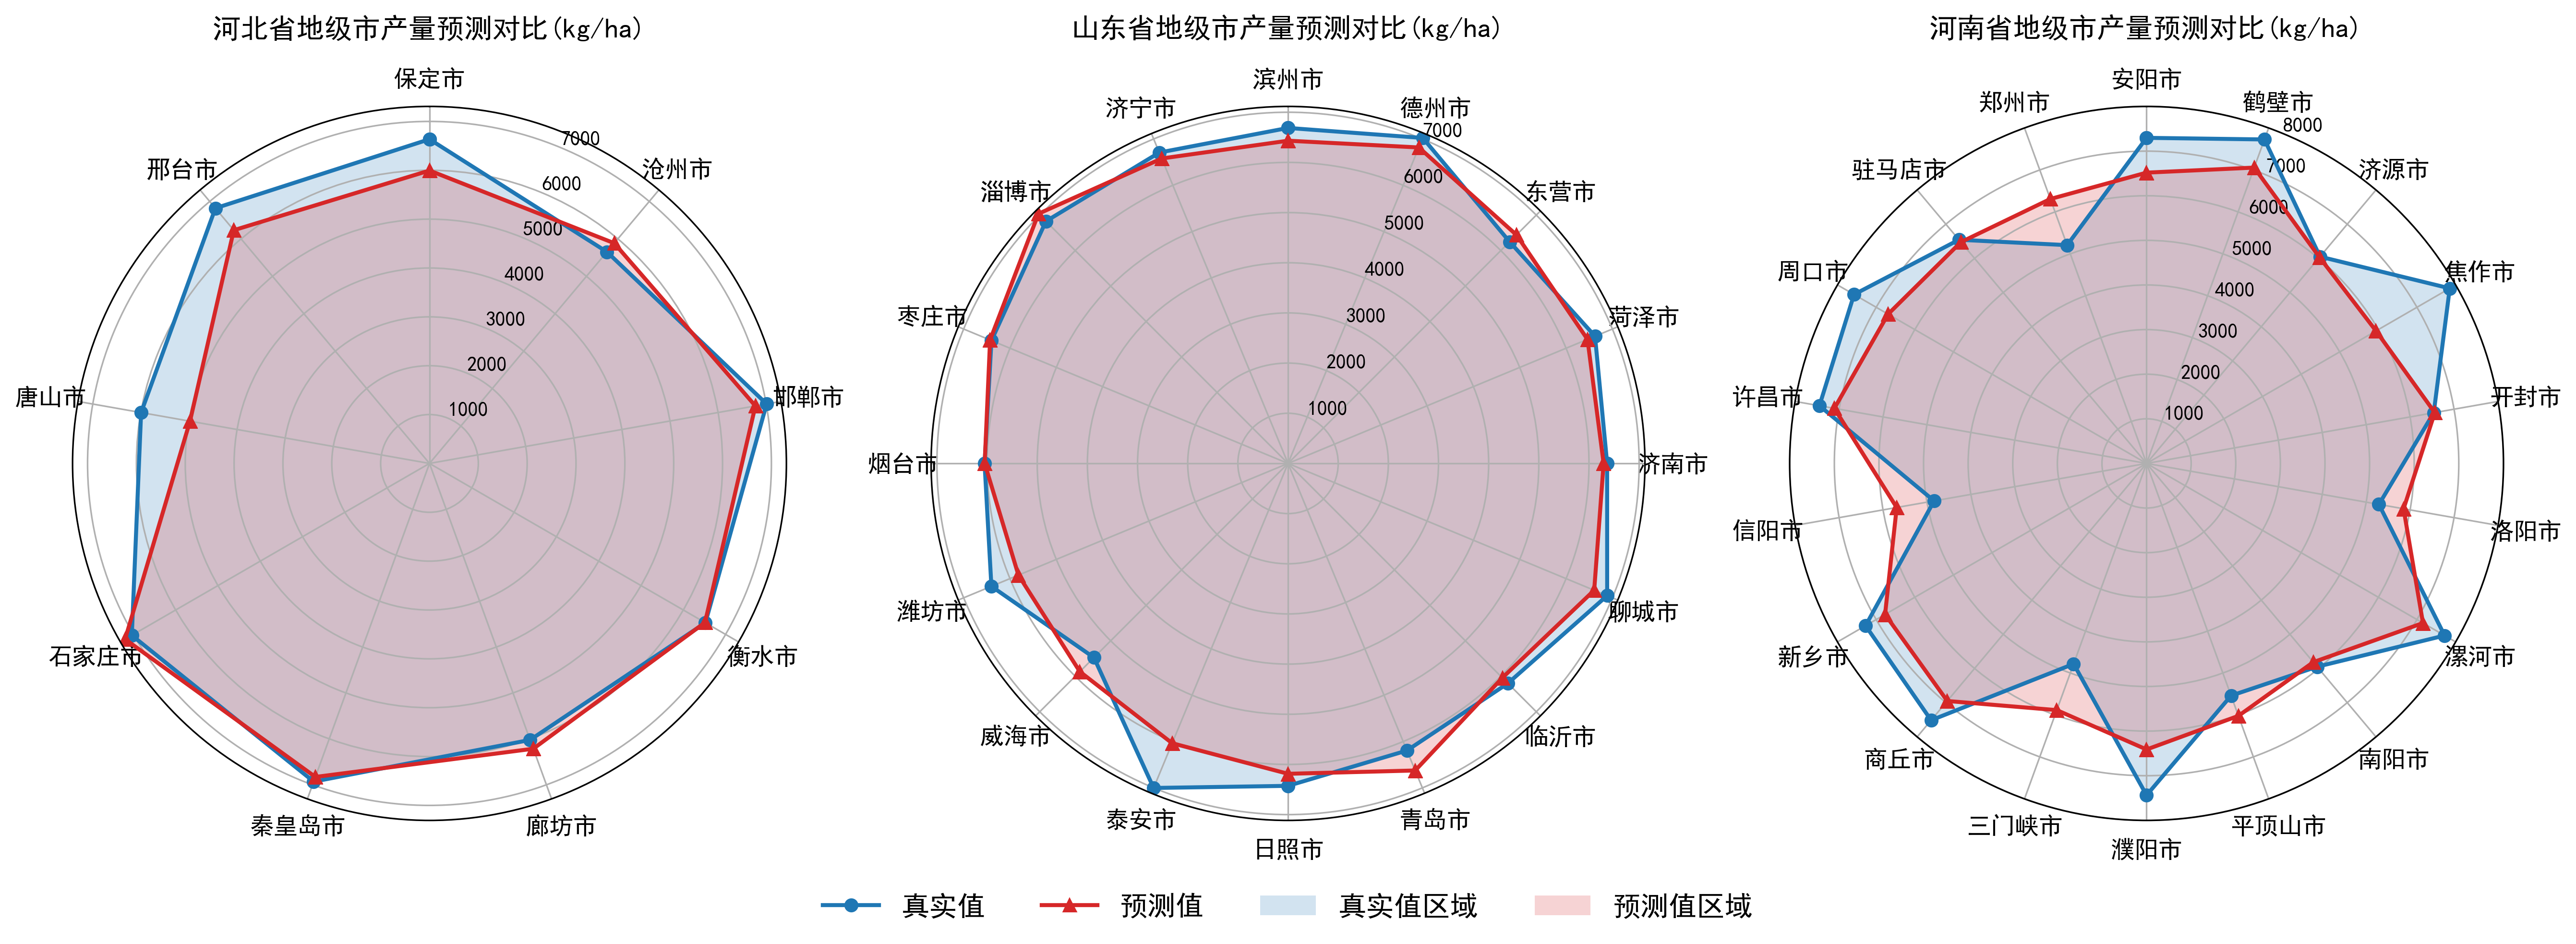

In [47]:
'''
Author: cunyu277 2465899266@qq.com
Date: 2025-04-23 19:30:23
LastEditors: cunyu277 2465899266@qq.com
LastEditTime: 2025-04-23 19:55:40
FilePath: \crop_yield_prediction\cunuu\plot\plo_error.ipynb
Description: 

Copyright (c) 2025 by yh, All Rights Reserved. 
'''

# 3. 选择三个省份
province_codes = [130000, 370000, 410000]  # 河北、山东、河南
province_names = ['河北省', '山东省', '河南省']
# 4. 创建画布
fig = plt.figure(figsize=(18, 6), dpi=300)
# fig.suptitle('各省地级市产量预测对比', y=1.05, fontsize=16)
# 主循环绘制子图
legend_handles = []  # 用于存储图例句柄
legend_labels = []   # 用于存储图例标签
for i, (code, name) in enumerate(zip(province_codes, province_names)):
    # 筛选当前省份且数据完整的地市
    province_data = merged[(merged['province_code'] == code) & 
                          (merged['真实值'].notna()) & 
                          (merged['预测值'].notna())]
    
    if province_data.empty:
        continue
        
    # 准备数据
    cities = province_data['地名'].tolist()
    actual = province_data['真实值'].tolist()
    predicted = province_data['预测值'].tolist()
    
    # 创建子图
    ax = fig.add_subplot(1, 3, i+1, polar=True)
    
    # 计算角度
    angles = np.linspace(0, 2*np.pi, len(cities), endpoint=False).tolist()
    angles += angles[:1]
    
    # 绘制真实值
    actual_plot = actual + [actual[0]]
    line1, = ax.plot(angles, actual_plot, 'o-', linewidth=2, 
                    color=colors['actual'], label='真实值')
    ax.fill(angles, actual_plot, color=colors['actual'], 
            alpha=colors['fill_alpha'])
    
    # 绘制预测值
    predicted_plot = predicted + [predicted[0]]
    line2, = ax.plot(angles, predicted_plot, '^-', linewidth=2, 
                    color=colors['predicted'], label='预测值')
    ax.fill(angles, predicted_plot, color=colors['predicted'], 
            alpha=colors['fill_alpha'])
    
    # 设置极坐标样式
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), cities, fontsize=12)
    # ax.set_title(f'{name} (n={len(cities)})', pad=10, fontsize=14)
    ax.set_title(f'{name}地级市产量预测对比(kg/ha)', pad=15, fontsize=14)
    
    # 只在第一次循环时收集图例句柄
    if i == 0:
        legend_handles.extend([line1, line2])


# 创建统一图例（包含填充区域）
fill_handles = [
    Patch(facecolor=colors['actual'], alpha=colors['fill_alpha'], label='真实值区域'),
    Patch(facecolor=colors['predicted'], alpha=colors['fill_alpha'], label='预测值区域')
]
# 添加图例（放在图形底部中央）
fig.legend(handles=legend_handles + fill_handles,
           labels=['真实值', '预测值', '真实值区域', '预测值区域'],
           loc='lower center',
           bbox_to_anchor=(0.5, -0.1),
           ncol=4,
           frameon=False,
           fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0)  # 为图例留出空间
plt.show()


TypeError: Legend.__init__() got an unexpected keyword argument 'label'

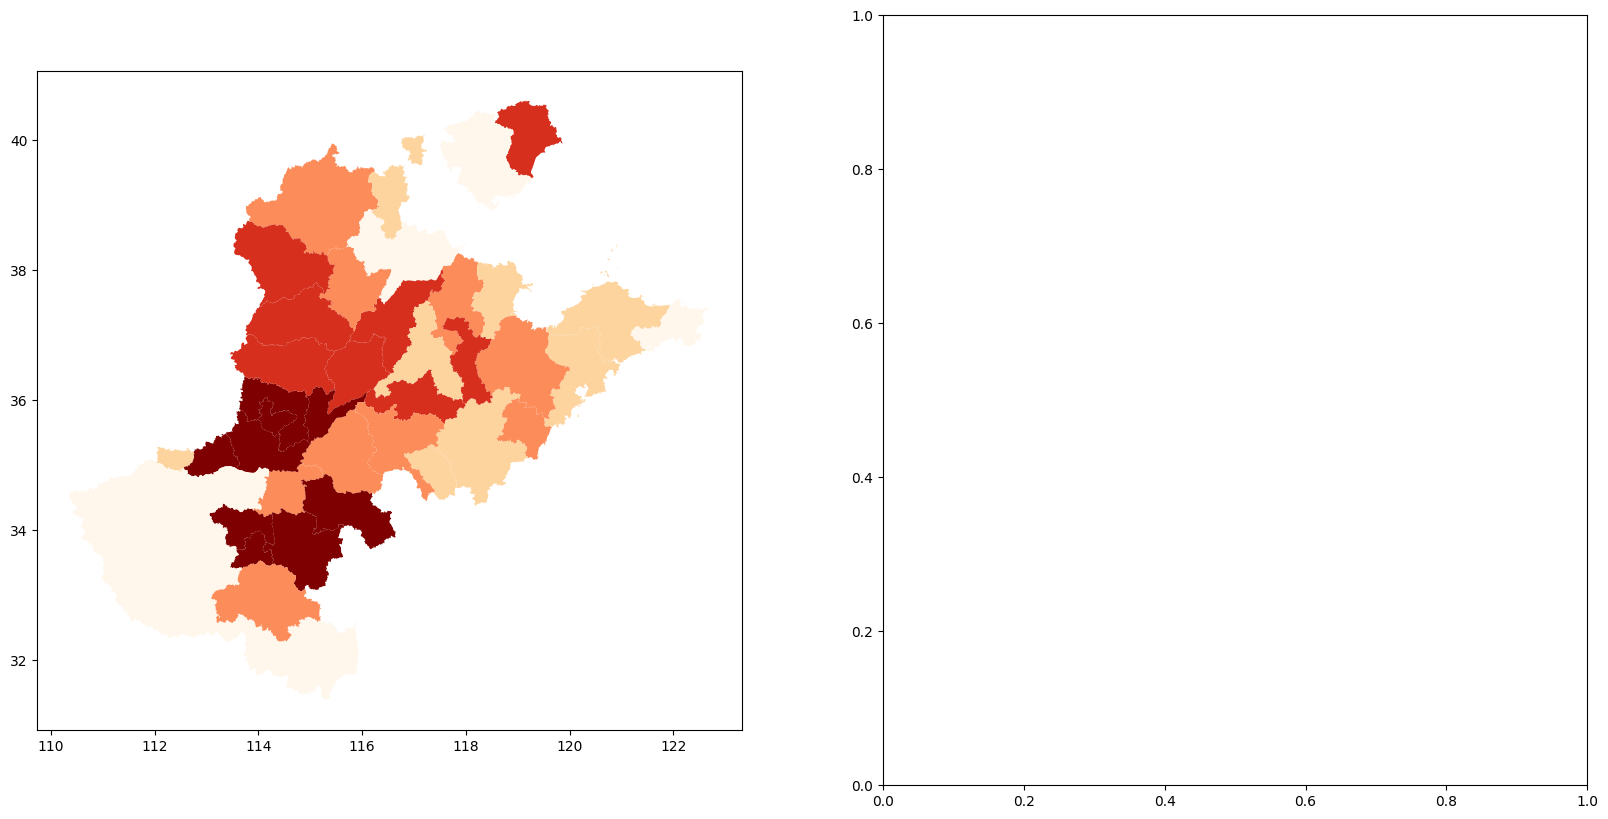

In [ ]:
# 4. 绘制预测值和实际值对比图
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
# 真实值地图
merged.plot(column='真实值', ax=ax[0], legend=True,
            legend_kwds={'title': "真实值", 'orientation': "horizontal"},
            cmap='OrRd', scheme='quantiles')
ax[0].set_title('真实值分布')
# 预测值地图
merged.plot(column='预测值', ax=ax[1], legend=True,
            legend_kwds={'title': "预测值", 'orientation': "horizontal"},
            cmap='OrRd', scheme='quantiles')
ax[1].set_title('预测值分布')
plt.tight_layout()
plt.show()
# 5. 绘制误差分布图
plt.figure(figsize=(10, 10))
merged.plot(column='绝对误差', legend=True,
           legend_kwds={'title': "绝对误差", 'orientation': "horizontal"},
           cmap='Reds', scheme='quantiles')
plt.title('预测绝对误差分布')
plt.show()
